In [23]:
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem,DataStructs
from rdkit.Chem import AllChem,PandasTools
import rdkit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, randint
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, balanced_accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config

In [2]:
df=pd.read_csv(r"C:\Users\19189\Desktop\original_data.csv")
df

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641
...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671


In [3]:
def MACCSfp(mol):
    fp = rdkit.Chem.rdMolDescriptors.GetMACCSKeysFingerprint(mol)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

In [4]:
from rdkit import DataStructs
def mol2fp(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol, 2, nBits=1024)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199,
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973,
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219,
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641,
...,...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420,
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273,
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061,
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671,

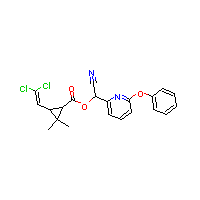
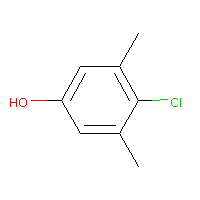
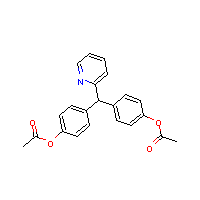
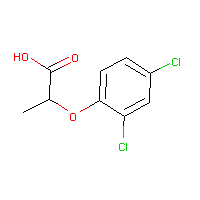
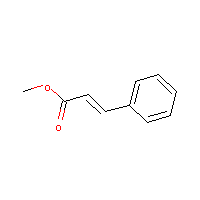
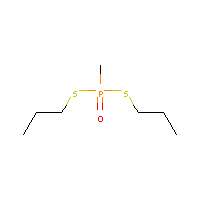
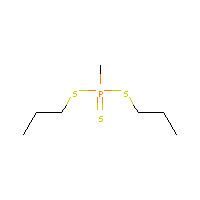
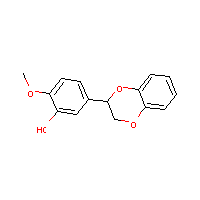
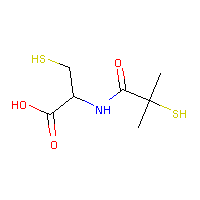
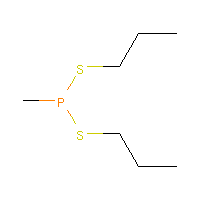

In [5]:
PandasTools.AddMoleculeColumnToFrame(df,'Canonical_QSARr','Molecule')
df

In [6]:
df["MACCS_FPs"] = df.Molecule.apply(MACCSfp)
df.head(2)

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule,MACCS_FPs
0,68523-18-2,460.0,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,<rdkit.Chem.rdchem.Mol object at 0x000001931B4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,88-04-0,3830.0,CC1C=C(O)C=C(C)C=1Cl,3.583199,<rdkit.Chem.rdchem.Mol object at 0x000001931B4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
df["Morgan_FPs"] = df.Molecule.apply(mol2fp)
df.head(2)

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,Molecule,MACCS_FPs,Morgan_FPs
0,68523-18-2,460.0,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,<rdkit.Chem.rdchem.Mol object at 0x000001931B4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,88-04-0,3830.0,CC1C=C(O)C=C(C)C=1Cl,3.583199,<rdkit.Chem.rdchem.Mol object at 0x000001931B4...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
MACCS_fp_df = df["MACCS_FPs"].apply(pd.Series)
MACCS_fp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,0


In [10]:
MACCS_x = MACCS_fp_df.iloc[:,0:167]
y = df['LogLD50'].values

In [9]:
Morgan2_fp_df = df["Morgan_FPs"].apply(pd.Series)
Morgan2_fp_df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Morgan2_x = Morgan2_fp_df.iloc[:,0:1024]

In [12]:
MD=pd.read_csv(r"C:\Users\19189\Desktop\mordred_descriptors.csv")
MD

,CASRN,CATMoS_LD50_mgkg,Canonical_QSARr,LogLD50,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,68523-18-2,460.00,CC1(C)C(C1C=C(Cl)Cl)C(=O)OC(C#N)C1C=CC=C(N=1)O...,2.662758,0.0,0.0,0,0,34.992970,2.613976,...,10.344674,84.588084,416.069448,9.044988,2244,39,146.0,172.0,10.201389,6.166667
1,88-04-0,3830.00,CC1C=C(O)C=C(C)C=1Cl,3.583199,0.0,0.0,0,0,11.643052,2.307250,...,9.078065,39.748909,156.034193,8.212326,110,13,48.0,54.0,4.944444,2.222222
2,603-50-9,4305.00,CC(=O)OC1C=CC(=CC=1)C(C1C=CC=CN=1)C1C=CC(=CC=1...,3.633973,0.0,0.0,0,0,34.387058,2.415622,...,10.045811,61.772145,361.131408,7.850683,1954,39,136.0,155.0,8.638889,6.000000
3,120-36-5,689.00,CC(OC1C=CC(Cl)=CC=1Cl)C(O)=O,2.838219,0.0,0.0,1,0,16.532794,2.301365,...,9.254262,45.062973,233.985049,10.635684,316,18,66.0,73.0,6.555556,3.138889
4,103-26-4,2610.00,COC(=O)C=CC1C=CC=CC=1,3.416641,0.0,0.0,0,0,15.354433,2.172565,...,8.688622,41.277218,162.068080,7.366731,226,12,52.0,55.0,4.222222,2.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11982,996-04-3,1.78,CP(=O)(SCCC)SCCC,0.250420,0.0,0.0,0,0,12.592066,2.188901,...,8.586906,39.549123,212.045844,7.573066,180,10,44.0,44.0,5.562500,2.750000
11983,996-05-4,18.00,CP(=S)(SCCC)SCCC,1.255273,0.0,0.0,0,0,12.592066,2.188901,...,8.586906,39.549123,228.023000,8.143679,180,10,44.0,44.0,5.562500,2.750000
11984,99784-08-4,7500.00,COC1C=CC(=CC=1O)C1COC2=CC=CC=C2O1,3.875061,0.0,0.0,0,0,25.276144,2.403626,...,9.883948,52.530255,258.089209,7.820885,720,30,100.0,118.0,5.416667,4.250000
11985,99874-01-8,5220.00,CC(C)(S)C(=O)NC(CS)C(O)=O,3.717671,0.0,0.0,1,0,13.983995,2.272120,...,9.131838,43.455545,223.033685,8.578219,256,16,58.0,62.0,7.895833,2.944444


In [13]:
MD_x=MD.iloc[:,4:1831]
MD_x =MD_x.astype(float)

In [17]:
MACCS_best_params={'alpha': 0.0014906977558625,
 'booster': 'dart',
 'colsample_bytree': 0.8546173904005345,
 'eta': 0.0456833498124193,
 'gamma': 3.3542988420770624e-05,
 'grow_policy': 'depthwise',
 'lambda': 0.2943003047107695,
 'max_depth': 14,
 'min_child_weight': 10,
 'n_estimators': 220,
 'normalize_type': 'forest',
 'rate_drop': 0.024216902211587,
 'sample_type': 'weighted',
 'skip_drop': 0.001261004949685,
 'subsample': 0.7218018660663547,
 'random_state':42,
 'verbosity': 0,
 'objective': 'reg:squarederror'}

In [15]:
MD_best_params={'alpha': 5.965346832119681e-06,
 'booster': 'gbtree',
 'verbosity': 0,
 'tree_method': 'exact',
 'objective': 'reg:squarederror',
 'colsample_bytree': 0.7295911276220814,
 'gamma': 7.372146242868913e-08,
 'grow_policy': 'lossguide',
 'lambda': 0.0002210864159401,
 'max_depth': 9,
 'eta':0.05,
 'min_child_weight': 4,
 'n_estimators': 220,
 'normalize_type': None,
 'rate_drop':None,
 'sample_type':None,
 'skip_drop': None,
 'subsample': 0.926368451515968,
 'random_state':42}

In [16]:
Morgan2_best_params={
 'alpha': 0.7649479542383486,
 'booster': 'dart',
 'colsample_bytree': 0.7077241744041765,
 'gamma': 3.101360545116887e-06,
 'grow_policy': 'depthwise',
 'lambda': 9.967083865273363e-07,
 'max_depth': 13,
 'min_child_weight': 7,
 'n_estimators': 380,
 'normalize_type': 'forest',
 'rate_drop': 0.0024379072904767,
 'sample_type': 'uniform',
 'skip_drop': 1.954766572348087e-05,
 'subsample': 0.9062406947874012,
 'random_state':42,
 'verbosity': 0,
 'objective': 'reg:squarederror',
 'tree_method': "exact",
 'eta':0.1}

In [25]:
from tqdm import tqdm
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
models = [xgb.XGBRegressor(random_state=42), xgb.XGBRegressor(**MACCS_best_params),xgb.XGBRegressor(random_state=42),xgb.XGBRegressor(**Morgan2_best_params),xgb.XGBRegressor(random_state=42),
          xgb.XGBRegressor(**MD_best_params)]

model_names = ['unoptimised_xgb_MACCS', 'optimised_xgb_MACCS', 'unoptimised_xgb_Morgan2', 'optimised_xgb_Morgan2','unoptimised_xgb_MD', 'optimised_xgb_MD']
X=[MACCS_x,Morgan2_x,MD_x]
scores_df = pd.DataFrame()
y = df['LogLD50']
for idx, model in enumerate(models):
    scores = []
    id=int(idx/2)
    x=X[id]
    for train_index, test_index in tqdm(kfold.split(x, y)):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]  # Correct indexing using iloc
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]  # Correct indexing using iloc

        model = model
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        scores.append(r2)

    scores_df[str(model_names[idx])] = scores

5it [00:00,  6.30it/s]
5it [04:51, 58.27s/it]
5it [00:04,  1.19it/s]
5it [14:53, 178.80s/it]
5it [00:50, 10.03s/it]
5it [04:07, 49.41s/it]


In [26]:
scores_df.loc[len(scores_df)] = scores_df.mean()
scores_df = scores_df.rename(index={5: "mean"})
scores_df

,unoptimised_xgb_MACCS,optimised_xgb_MACCS,unoptimised_xgb_Morgan2,optimised_xgb_Morgan2,unoptimised_xgb_MD,optimised_xgb_MD
0,0.547182,0.578294,0.493948,0.586190,0.525961,0.586142
1,0.553139,0.595780,0.505446,0.573723,0.528386,0.593579
2,0.534826,0.595497,0.471836,0.576616,0.536228,0.598726
3,0.519474,0.566180,0.486600,0.561587,0.536924,0.575105
4,0.573250,0.623970,0.512823,0.592586,0.539006,0.600517
mean,0.545574,0.591944,0.494131,0.578140,0.533301,0.590814


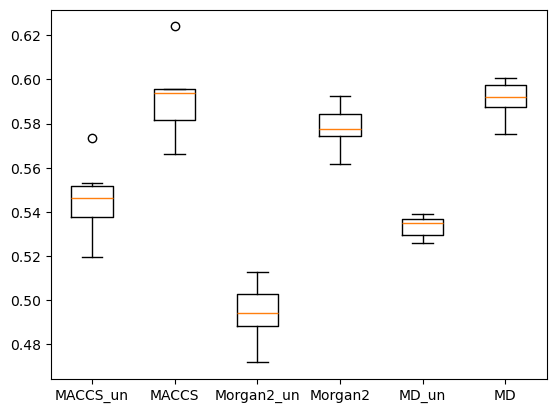

In [32]:
plt.figuresize=(16,16)
label=['MACCS_un','MACCS','Morgan2_un','Morgan2','MD_un','MD']
plt.boxplot([scores_df.unoptimised_xgb_MACCS, scores_df.optimised_xgb_MACCS,scores_df.unoptimised_xgb_Morgan2,scores_df.optimised_xgb_Morgan2,scores_df.unoptimised_xgb_MD,scores_df.optimised_xgb_MD], labels=label)
plt.show()